In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Recommendation Engines

_Author: Alex Combs (NYC) _

---

<a id="learning-objectives"></a>
### Learning Objectives
*After this lesson, you will be able to:*
- Explain what a recommendation engines is
- Explain the math behind recommendation engines
- Explain the types of recommendation engines and their pros and cons

<a id="what-is-a-recommendation-engine"></a>
## What is a recommendation engine?
---

At its most basic: A system designed to match users to things that they will like.

- The "things" can be products, brands, media, or even other people. 
- Ideally, they should be things the user doesn't know about. 
- **The goal is to rank all the possible things that are available to the user and to only present the top items**

<a id="why-bother"></a>
### Why bother?

- We're living in an age of ***Choice Overload***. Want to watch a movie or a show? Thousands are available at our fingertips. Want to buy something? Hundreds of possible variations are available. How do I find what's the most suitable for me personally? Data to the rescue!
- 1/4 to a 1/3 of consumer choices at Amazon are driven by personalized recommendations
- Netflix says there recommendation engine reduces churn saving the company in excess of $1 billion a year
- Hulu [has shown](http://tech.hulu.com/blog/2011/09/19/recommendation-system.html) that showing recommended TV shows results in over 3x more clicks than only showing the most popular TV shows.

<a id="who-uses-recommendation-systems"></a>
### Who uses recommendation systems?

- Youtube
- Netflix
- Pandora
- Hulu
- Tinder
- Facebook
- Barnes & Noble (receipts recommend other books)
- Target (sent directed ads based on motherhood predictions)
- News websites
- Food delivery apps

Recommendation is everywhere! Anytime you open a webpage or an app and see something different from another person (or opening the same page in an incognito window), high chance its using some recommendation algorithm to personlize the content for you!

<a id="explicit-data-vs-implicit-data"></a>
### Explicit data vs Implicit data
- The data used for generating recommendations

#### Explicit
- Explicity given/pro-actively acquired
- Clear signals
- Cost associated with acquisition (time/cognitive)
- Limited and sparse data because of this
- Eg: Star rating in ecommerce, customer reviews


#### Implicit
- Provided/collected passively (digital exhaust)
- Signals can be difficult to interpret
- Enormous quantities
- Eg: Just using the app and clicking on various products: search "product name" -> Click product 1 -> click product 2 -> 3 -> 4 -> 5. This series of clicks "clickstream" are a good indicator to recommend you the next product you might be interested in!

<a id="two-classical-recommendation-methods"></a>
### Two classical recommendation methods

- **Collaborative Filtering**: _(similar people)_
    - If you like the same 5 movies as someone else, you'll likely enjoy other movies they like.
    - There are two main types: 
        1. Find users who are similar and recommend what they like (**user-based**)
        2. Recommend items that are similar to already-liked items (**item-based**).
   


- **Content-Based Filtering** _(similar items)_
    - If you enjoy certain characteristics of movies (e.g. certain actors, genre, etc.), you'll enjoy other movies with those characteristics.
    - Note this can easily be done using machine learning methods! Each movie can be decomposed into features. Then, for each user we compute a model -- the target can be a binary classifier (e.g. "LIKE"/"DISLIKE") or regression (e.g. star rating).

<a id="user-based-collaborative-filtering"></a>
## User-based Collaborative Filtering
---

We'll first look at user-based filtering. The idea behind this method is finding your taste **doppelgänger**. This is the person who is most similar to you based upon the ratings both of you have given to a mix of products.

<a id="so-lets-see-how-we-construct-it"></a>
## So, let's see how we construct it

We begin with what's called a utility matrix. This is a **user** (rows) x **product** (columns) matrix.

In [2]:
movies = ["user", "Friday the 13th", "Nightmare on Elm St", "Dawn of the Dead", "Hiro Dreams of Sushi", "180 South", "Exit Through the Giftshop"]
users = [
    ("Chuck", 5, 4, None, None, None, 1),
    ("Nancy", 5, None, 4, None, 2, None),
    ("Anya", 4, 5, 5, None, 1, None),
    ("Divya", 1, None, 2, 5, 4, 5),
    ("Pat", 1, 1, 1, None, 3, 4),
]

users = pd.DataFrame(users, columns=movies)
users = users.set_index("user")
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,5,4.0,NaN,NaN,NaN,1.0
Nancy,5,NaN,4.0,NaN,2.0,NaN
Anya,4,5.0,5.0,NaN,1.0,NaN
Divya,1,NaN,2.0,5.0,4.0,5.0
Pat,1,1.0,1.0,NaN,3.0,4.0


***Check:*** If we want to find the most similar users, what do we need?

<a id="formula"></a>
If we want to find the users most similar to user A, we need a **similarity metric**. [9 Distance Measures in Data Science Medium Post](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa)

One metric we can use is **cosine similarity**. Cosine similarity uses the cosine between two vectors to compute a scalar value that represents how closely related these vectors are. 

## $$
cos(\theta) = \frac{\vec{Chuck} \cdot \vec{Nancy}}{\left\| \vec{Chuck}\right\| \left\| \vec{Nancy}\right\| } \
= \frac{\sum{Chuck_i Nancy_i}}{\sqrt{\sum{Chuck_i^2}}\sqrt{\sum{Nancy_i^2}}}
$$

- Angle of $0^{\circ}$ (same direction): $\cos(0^{\circ}) = 1$. Perfectly similar.
- Angle of $90^{\circ}$ (orthogonal): $\cos(90^{\circ}) = 0$. Totally dissimilar.
- Angle of $180^{\circ}$ (opposite direction): $\cos(90^{\circ}) = -1$. Opposite.


Doesn't this sound a lot like the correlation coefficient? It turns out that cosine similarity is identical to the **uncentered correlation coefficient**! As a bonus, if the points are mean-centered, then this formula also depicts the **Pearson correlation coefficient**.

<a id="cosine-similarity-using-sci-kit-learn"></a>
## Cosine similarity using sci-kit learn

With that, let's calculate the cosine similarity of A against all other users. We'll start with B. We have a sparse matrix with lot's of missing values... what should we do?
- First let's subtract each value from the average rating of each user
- Then fill na with 0

In [3]:
users_mc = users.copy()

In [4]:
# Let's find the average rating of each user
users_mc['user_avg_rating'] = users_mc.mean(axis=1)
users_mc

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop,user_avg_rating
user,,,,,,,
Chuck,5,4.0,NaN,NaN,NaN,1.0,3.333333
Nancy,5,NaN,4.0,NaN,2.0,NaN,3.666667
Anya,4,5.0,5.0,NaN,1.0,NaN,3.750000
Divya,1,NaN,2.0,5.0,4.0,5.0,3.400000
Pat,1,1.0,1.0,NaN,3.0,4.0,2.000000


In [5]:
users_mc.columns

Index(['Friday the 13th', 'Nightmare on Elm St', 'Dawn of the Dead',
       'Hiro Dreams of Sushi', '180 South', 'Exit Through the Giftshop',
       'user_avg_rating'],
      dtype='object')

In [6]:
# Let's subtract the average for each value
for col in users_mc.columns:
    users_mc[col] = users_mc[col] - users_mc['user_avg_rating']
    
users_mc

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop,user_avg_rating
user,,,,,,,
Chuck,1.666667,0.666667,NaN,NaN,NaN,-2.333333,0.0
Nancy,1.333333,NaN,0.333333,NaN,-1.666667,NaN,0.0
Anya,0.250000,1.250000,1.250000,NaN,-2.750000,NaN,0.0
Divya,-2.400000,NaN,-1.400000,1.6,0.600000,1.600000,0.0
Pat,-1.000000,-1.000000,-1.000000,NaN,1.000000,2.000000,0.0


In [7]:
# Drop the user_avg_rating column
users_mc = users_mc.drop(columns=['user_avg_rating'])
users_mc

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1.666667,0.666667,NaN,NaN,NaN,-2.333333
Nancy,1.333333,NaN,0.333333,NaN,-1.666667,NaN
Anya,0.250000,1.250000,1.250000,NaN,-2.750000,NaN
Divya,-2.400000,NaN,-1.400000,1.6,0.600000,1.600000
Pat,-1.000000,-1.000000,-1.000000,NaN,1.000000,2.000000


In [8]:
users_mc = users_mc.fillna(0)
users_mc

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1.666667,0.666667,0.000000,0.0,0.000000,-2.333333
Nancy,1.333333,0.000000,0.333333,0.0,-1.666667,0.000000
Anya,0.250000,1.250000,1.250000,0.0,-2.750000,0.000000
Divya,-2.400000,0.000000,-1.400000,1.6,0.600000,1.600000
Pat,-1.000000,-1.000000,-1.000000,0.0,1.000000,2.000000


In [9]:
# Let's write the whole thing as a function as we can use it easily
def mean_center_rows(data):
    # Create a copy of the data so we don't overwrite it
    data = data.copy()
    
    # Let's find the average rating of each user
    data['user_avg_rating'] = data.mean(axis=1)
    
    # Let's subtract the average for each value
    for col in data.columns:
        data[col] = data[col] - data['user_avg_rating']
        
    # Drop the user_avg_rating column
    data = data.drop(columns=['user_avg_rating'])
    
    # Fill NA
    data = data.fillna(0)
    
    return data

Now let's calculate the (cosine) similarity for each user vs every other user

Do these results make sense??

In [10]:
sim_matrix = cosine_similarity(users_mc)
users_sim = pd.DataFrame(sim_matrix, columns=users_mc.index, index=users_mc.index)
users_sim

user,Chuck,Nancy,Anya,Divya,Pat
user,,,,,
Chuck,1.000000,0.349428,0.129503,-0.723026,-0.840673
Nancy,0.349428,1.000000,0.752993,-0.594588,-0.545545
Anya,0.129503,0.752993,1.000000,-0.335791,-0.593080
Divya,-0.723026,-0.594588,-0.335791,1.000000,0.739574
Pat,-0.840673,-0.545545,-0.593080,0.739574,1.000000


<AxesSubplot:xlabel='user', ylabel='user'>

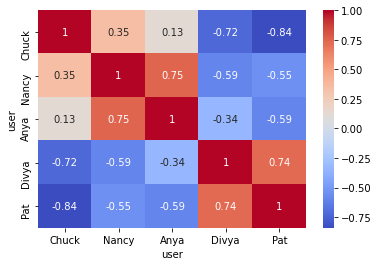

In [11]:
sns.heatmap(users_sim, annot=True, cmap='coolwarm')

<a id="but-how-do-we-predict-the-rating-of-an-item-for-a-user"></a>
## But how do we predict the rating of an item for a user?

**Will Nancy like Nightmare on Elm St?**

To answer this we will predict Nancy's rating using the _weighted results of the other users_.

This is where a little art comes in... let's make the decision to only include users that have a positive similarity score relative to Nancy.

In [12]:
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,5,4.0,NaN,NaN,NaN,1.0
Nancy,5,NaN,4.0,NaN,2.0,NaN
Anya,4,5.0,5.0,NaN,1.0,NaN
Divya,1,NaN,2.0,5.0,4.0,5.0
Pat,1,1.0,1.0,NaN,3.0,4.0


In [13]:
users_sim

user,Chuck,Nancy,Anya,Divya,Pat
user,,,,,
Chuck,1.000000,0.349428,0.129503,-0.723026,-0.840673
Nancy,0.349428,1.000000,0.752993,-0.594588,-0.545545
Anya,0.129503,0.752993,1.000000,-0.335791,-0.593080
Divya,-0.723026,-0.594588,-0.335791,1.000000,0.739574
Pat,-0.840673,-0.545545,-0.593080,0.739574,1.000000


The gist of what we want to do is given by the following formulaL

$$\frac{\text{Chuck-Nancy sim}}{\text{sum of similarities}}*\text{Chuck rating} + \frac{\text{Nancy-Anya sim}}{\text{sum of similarities}}*\text{Anya ratings}$$

Here's the procedure for recommending movie X to Nancy:

1. Get Nancy's similarity scores to all other **users**.
2. Only keep positive similarities.  (This step can be tweaked!)
3. Convert Nancy's similarities to _weights_ by dividing each similarity by the _total_ similarity.
4. Get all the other users' ratings for movie X.
5. Weight each user's rating by Nancy's similarity to that user.

In [14]:
users_sim['Nancy']

user
Chuck    0.349428
Nancy    1.000000
Anya     0.752993
Divya   -0.594588
Pat     -0.545545
Name: Nancy, dtype: float64

In [15]:
# get Nancy's similarity scores
nancy_sim = users_sim['Nancy'].drop('Nancy')
nancy_sim = nancy_sim[nancy_sim > 0]
nancy_sim

user
Chuck    0.349428
Anya     0.752993
Name: Nancy, dtype: float64

In [16]:
# Turn Nancy's similarity scores to weights
nancy_weights = nancy_sim.values/np.sum(nancy_sim.values)
nancy_weights

array([0.3169643, 0.6830357])

In [17]:
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,5,4.0,NaN,NaN,NaN,1.0
Nancy,5,NaN,4.0,NaN,2.0,NaN
Anya,4,5.0,5.0,NaN,1.0,NaN
Divya,1,NaN,2.0,5.0,4.0,5.0
Pat,1,1.0,1.0,NaN,3.0,4.0


In [18]:
nancy_sim.index

Index(['Chuck', 'Anya'], dtype='object', name='user')

In [19]:
users['Nightmare on Elm St'].drop('Nancy')

user
Chuck    4.0
Anya     5.0
Divya    NaN
Pat      1.0
Name: Nightmare on Elm St, dtype: float64

In [20]:
# Get elm_st_ratings
elm_st_ratings = users['Nightmare on Elm St'].drop('Nancy').loc[nancy_sim.index]
elm_st_ratings

user
Chuck    4.0
Anya     5.0
Name: Nightmare on Elm St, dtype: float64

In [21]:
# Multiply each element and add up the results
np.dot(elm_st_ratings.values, nancy_weights)

4.683035701380843

How would we get expected ratings for all of the movies that Nancy has not seen?

In [22]:
# We want to find all the movies that Nancy is NOT NA
# This will be easier to do if Nancy was a column rather than a row
ratings = users.T
ratings

user,Chuck,Nancy,Anya,Divya,Pat
Friday the 13th,5.0,5.0,4.0,1.0,1.0
Nightmare on Elm St,4.0,NaN,5.0,NaN,1.0
Dawn of the Dead,NaN,4.0,5.0,2.0,1.0
Hiro Dreams of Sushi,NaN,NaN,NaN,5.0,NaN
180 South,NaN,2.0,1.0,4.0,3.0
Exit Through the Giftshop,1.0,NaN,NaN,5.0,4.0


In [23]:
# Find the rows that are Null for Nancy
ratings = ratings[ratings['Nancy'].isnull()]
ratings

user,Chuck,Nancy,Anya,Divya,Pat
Nightmare on Elm St,4.0,NaN,5.0,NaN,1.0
Hiro Dreams of Sushi,NaN,NaN,NaN,5.0,NaN
Exit Through the Giftshop,1.0,NaN,NaN,5.0,4.0


In [24]:
# Drop the Nancy column
ratings = ratings.drop(columns=['Nancy'])
ratings 

user,Chuck,Anya,Divya,Pat
Nightmare on Elm St,4.0,5.0,NaN,1.0
Hiro Dreams of Sushi,NaN,NaN,5.0,NaN
Exit Through the Giftshop,1.0,NaN,5.0,4.0


In [25]:
nancy_sim

user
Chuck    0.349428
Anya     0.752993
Name: Nancy, dtype: float64

In [26]:
# Keep only users who have positive correlation to Nancy
ratings = ratings[nancy_sim.index]
ratings

user,Chuck,Anya
Nightmare on Elm St,4.0,5.0
Hiro Dreams of Sushi,NaN,NaN
Exit Through the Giftshop,1.0,NaN


In [27]:
# Perform the dot product to calculate Nancy's estimated rating 
nancy_ratings = np.dot(ratings.fillna(0).values, nancy_weights)
pd.DataFrame(nancy_ratings, index=ratings.index)

,0
Nightmare on Elm St,4.683036
Hiro Dreams of Sushi,0.000000
Exit Through the Giftshop,0.316964


#### Check: What might be some problems with user-based filtering?

- Items that get a lot of likes will have users who like all kinds of other items. So, recommendations based on frequently-liked items may be inaccurate.

- User-based filtering also suffers from the **cold-start problem**. If a new user joins and has very few likes, then it is difficult to pair them with a similar user.

- Lastly, suppose that a user with few likes adds a new like. This may significantly change the recommendations. Hence, as users add likes, the recommendations must be continually and quickly updated.

In practice, there is a type of collaborative filtering that can perform much better than user-based filtering: **item-based filtering**.

<a id="item-based-collaborative-filtering"></a>
## Item-based Collaborative Filtering

In item-based filtering, we are trying to find similarities across items rather than users.

> Rather than looking for _similar users_, we are going to look for _similar movies/items_.  Similar items are determined by user rating patterns.

Basically, everything here is the same as in user-based collaborative filtering, except we will deal with the _transpose_ or our data matrix.

Just as in user-based filtering, we need to center our values by row.

In [28]:
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,5,4.0,NaN,NaN,NaN,1.0
Nancy,5,NaN,4.0,NaN,2.0,NaN
Anya,4,5.0,5.0,NaN,1.0,NaN
Divya,1,NaN,2.0,5.0,4.0,5.0
Pat,1,1.0,1.0,NaN,3.0,4.0


In [29]:
movies = users.T.copy()
movies

user,Chuck,Nancy,Anya,Divya,Pat
Friday the 13th,5.0,5.0,4.0,1.0,1.0
Nightmare on Elm St,4.0,NaN,5.0,NaN,1.0
Dawn of the Dead,NaN,4.0,5.0,2.0,1.0
Hiro Dreams of Sushi,NaN,NaN,NaN,5.0,NaN
180 South,NaN,2.0,1.0,4.0,3.0
Exit Through the Giftshop,1.0,NaN,NaN,5.0,4.0


<AxesSubplot:>

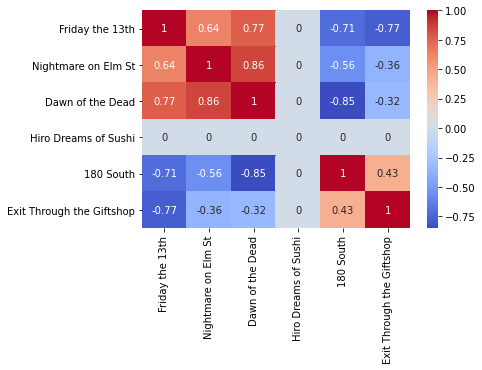

In [30]:
# Mean Center the dataframe
movies_mc = mean_center_rows(movies)

# Cosine Similarities
sim_matrix = cosine_similarity(movies_mc)
movies_sim = pd.DataFrame(sim_matrix, columns=movies.index, index=movies.index)
sns.heatmap(movies_sim, annot=True, cmap='coolwarm')

The nearest movies to _Nightmare on Elm St_ are _Firday the 13th_ and _Dawn of the Dead_. To calculate Nancy's rating for our _Nightmare on Elm St_, we have the following equation:

** (1st closest cosine sim movie x Nancy's rating + 2nd closest cosine sim movie x Nancy's product rating) / (sum of 1st and 2nd's cosine sims) **

Here's the procedure for recommending movie X to Nancy:

1. Get movie X's similarity scores to all other **movies**.
2. Only keep positive similarities.  (This step can be tweaked!)
3. Convert movie X's similarities to _weights_ by dividing each similarity by the _total_ similarity.
4. Get Nancy's ratings for all other movies.
5. Weight Nancy's ratings for all other movies by movie X's similarity to those movies.

In [31]:
# get Elm St similarity scores
elm_st_sim = movies_sim['Nightmare on Elm St'].drop('Nightmare on Elm St')
elm_st_sim = elm_st_sim[elm_st_sim > 0]
elm_st_sim

Friday the 13th     0.635369
Dawn of the Dead    0.859338
Name: Nightmare on Elm St, dtype: float64

In [25]:
# Turn Elm St similarity scores to weights
elm_st_weights = elm_st_sim.values/np.sum(elm_st_sim.values)
elm_st_weights

array([0.42507927, 0.57492073])

In [26]:
# Get Nancy's_ratings
nancy_ratings = movies['Nancy'].loc[elm_st_sim.index]
nancy_ratings

Friday the 13th     5.0
Dawn of the Dead    4.0
Name: Nancy, dtype: float64

In [27]:
# Nancy's estimated rating for 'Nightmare on Elm St'
np.dot(nancy_ratings.values, elm_st_weights)

4.425079267585091

<a id="content-based-filtering"></a>
## Content-based Filtering

Finally, there is another method called content-based filtering. In content-based filtering, the items are broken down into "feature baskets". These are the characteristics that represent the item. The idea is that if you like the features of song X, then finding a song that has similar characteristics will tell us that you're likely to like it as well.


The quintessential example of this is Pandora with it's musical genome. Each song is rated on ~450 characteristics by trained musicologists.

In recent years it's become more common to use a Deep Learning model to extract "embedding" vectors that are specific to the domain (image, text, audio, etc) for this purpose. Check out this [Medium Post](https://towardsdatascience.com/powering-semantic-similarity-search-in-computer-vision-with-state-of-the-art-embeddings-f6c183fff134?sk=3cff65cda237c9d21225552230d53d48) to get an idea of the possibilities of embeddings

<a id="example"></a>
## Example 
Content-based filtering begins by mapping each item into
a feature space. Both users and items are represented by
vectors in this space.
Item vectors measure the degree to which the item is
described by each feature, and user vectors measure a
user’s preferences for each feature.
Ratings are generated by taking dot products of user &
item vectors. 

<img src="http://i.imgur.com/NzHksKK.png">

---

Let's look at a music database as an example

In [32]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [33]:
artist_genre = pd.read_csv('../datasets/artist_genre.csv')
artist_genre.set_index('artist', inplace=True)
print(artist_genre.shape)
artist_genre.head()

(472, 3572)


,'80s,0 play yet,00's,00s,1008,10s,1337,1960's,1960s,1969,...,yeah fuckin yeah,yearns to be covered,yorkshire,you,young,youtube,zac efron,zadrotstvo,zajebiste,zombie rave
artist,,,,,,,,,,,,,,,,,,,,,
*NSYNC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2NE1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2PM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Pac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3 Doors Down,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Basic Similarity Metric: "Give me something like Linkin Park!"

In [34]:
artist_sim = pd.DataFrame(cosine_similarity(artist_genre), columns=artist_genre.index, index=artist_genre.index)
artist_sim.head()

artist,*NSYNC,2NE1,2PM,2Pac,3 Doors Down,30 Seconds to Mars,3OH!3,3mmey,9th Wonder,:wumpscut:,...,××× × ××××,×¢××¨× ××××¨,ã¢ã³ã´ã«800,ä¸­å³¶ç¾å,å®å¤ç°ãã«ã«,å±±ä¸æºä¹,åµ,æµå´ããã¿,é -MIYAVI-,ë°±ì§ì
artist,,,,,,,,,,,,,,,,,,,,,
*NSYNC,1.000000,0.397236,0.146254,0.136694,0.050920,0.022237,0.219995,0.0,0.000000,0.000000,...,0.0,0.036155,0.0,0.063914,0.191205,0.0,0.138648,0.122591,0.011549,0.000000
2NE1,0.397236,1.000000,0.341882,0.000000,0.012529,0.000000,0.310186,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.059761,0.204324,0.0,0.194461,0.060330,0.000000,0.218218
2PM,0.146254,0.341882,1.000000,0.000000,0.009995,0.000000,0.091163,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.047673,0.122245,0.0,0.051709,0.048126,0.000000,0.870388
2Pac,0.136694,0.000000,0.000000,1.000000,0.006228,0.009474,0.213685,0.0,0.797053,0.005765,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.010740,0.014993,0.000000,0.000000
3 Doors Down,0.050920,0.012529,0.009995,0.006228,1.000000,0.866220,0.120275,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.005241,0.020160,0.0,0.017055,0.013228,0.000000,0.000000


In [35]:
artist_sim['Linkin Park'].sort_values(ascending=False).head(10)
# artist_sim['Gorillaz'].sort_values(ascending=False).head(10)
# artist_sim['Kylie Minogue'].sort_values(ascending=False).head(10)

artist
Linkin Park           1.000000
Papa Roach            0.949455
Limp Bizkit           0.861365
Lostprophets          0.817249
Cold                  0.809049
Crossfade             0.803420
3 Doors Down          0.786667
30 Seconds to Mars    0.785756
The Rasmus            0.783447
Deftones              0.781550
Name: Linkin Park, dtype: float64

### Profile-Based Recommendations

In [33]:
# Let's create a vector for myself by initializing all the genres to zero
genres = artist_genre.columns.tolist()
my_profile = pd.Series(np.zeros(len(genres)), index=artist_genre.columns)

# Then update only those genres that I'm interested in
my_profile['rock'] = 4
my_profile['world'] = 3
my_profile['folk'] = 1
my_profile['electronic'] = 3

# Finally Find the dot product between the artist_genre vectors and my personal vector
recommendations = np.dot(artist_genre.values, my_profile.values)
recommendations = pd.Series(recommendations, index=artist_genre.index)
recommendations.sort_values(ascending=False).head(20)

artist
Radiohead                294.0
Muse                     275.0
The Beatles              271.0
Depeche Mode             249.0
Paramore                 233.0
U2                       211.0
Linkin Park              201.0
Coldplay                 180.0
Red Hot Chili Peppers    176.0
30 Seconds to Mars       174.0
Lady Gaga                173.0
The Killers              169.0
Evanescence              155.0
Avril Lavigne            155.0
Placebo                  141.0
Green Day                140.0
Nirvana                  140.0
Pink Floyd               136.0
Gorillaz                 129.0
My Chemical Romance      128.0
dtype: float64

<a id="conclusion"></a>
## Conclusion
---

We have looked at the major types of recommender systems in this lesson. Let's quickly wrap up by looking at the pros and cons of each.

#### Collaborative Filtering 

Pros:
- No need to hand craft features

Cons:
- Needs a large existing set of ratings (cold-start problem)
- Sparsity occurs when the number of items far exceeds what a person could purchase

#### Content-based Filtering

Pros:
- No need for a large number of users

Cons:
- Lacks serendipity (Finding something good without looking for it)
- May be difficult to generate the right features. Newer Deep Learning models have solved this problem for the most part.
- Hard to create cross-content recommendations (different feature spaces). Eg. Recommending branded attire to fans of a a music band.

In fact, the best solution -- and the one most likely in use in any large-scale, production system is a combination of both of these. This is known as a **hybrid system**. By combining the two systems, you can get the best of both worlds.

<a id="extra-practice"></a>
## What's Next
---

In the next lesson we will use the [MovieLens dataset](https://grouplens.org/datasets/movielens/100k/), and experiment with building a recommender system. Check the "Additional Resources" for more information and some considerations on how to evaluate these systems.

<a id="additional-resources"></a>
## Additional Resources
---

- [Wharton Study of Recommender Systems](http://knowledge.wharton.upenn.edu/article/recommended-for-you-how-well-does-personalized-marketing-work/)
- [Netflix Recommendations](https://www.rtinsights.com/netflix-recommendations-machine-learning-algorithms/)
- [Netflix Paper](http://dl.acm.org/citation.cfm?id=2843948)
- [NY Times Rec System](https://open.blogs.nytimes.com/2015/08/11/building-the-next-new-york-times-recommendation-engine)
- [Evaluating Rec Systems](https://www.quora.com/How-do-you-measure-and-evaluate-the-quality-of-recommendation-engines)